In [2]:
# --- Actigraphy -> Sleep/Wake using Cole–Kripke (BioPsyKit) ---
# pip install biopsykit

import os, io
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

FILE = '/Users/orduek/Library/CloudStorage/OneDrive-BGU/PTSD Cohort/data/PTSD_Cohort-30092025/1063_14a4f54d/garmin-device-actigraphy/250902_garmin-device-actigraphy_1063_14a4f54d.csv'


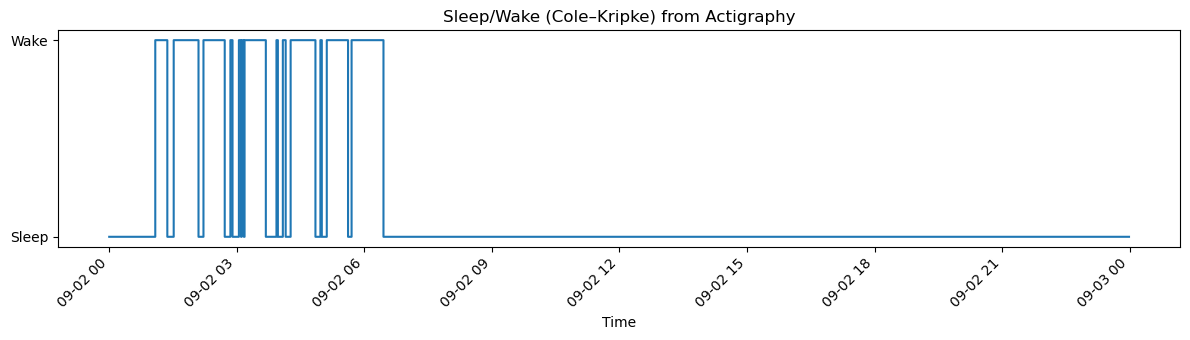

Total minutes: 1440
Sleep minutes: 1201
Wake minutes : 239
Sleep efficiency (actigraphy epoch-wise): 83.4%


In [3]:

def load_labfront_actigraphy(path):
    """Return pandas Series of activity counts at 1-min epochs from Labfront CSV."""
    with open(path, "r", encoding="utf-8") as f:
        lines = f.read().splitlines()
    sep = next((i for i, ln in enumerate(lines) if ln.strip() == ""), None)
    if sep is None:
        raise ValueError("No blank line separating metadata and data.")
    df = pd.read_csv(io.StringIO("\n".join(lines[sep+1:])))
    # Use zeroCrossingCount as activity proxy (1-min epochs in your file)
    df["timestamp"] = pd.to_datetime(df["isoDate"], errors="coerce")
    s = (df
         .set_index("timestamp")["zeroCrossingCount"]
         .astype(float)
         .sort_index())
    # enforce 1-min regular sampling (fill small gaps if any)
    s = s.resample("1min").mean().interpolate(limit=2)
    return s.rename("activity")

act = load_labfront_actigraphy(FILE)

# Cole–Kripke via BioPsyKit
from biopsykit.sleep.sleep_wake_detection.algorithms.cole_kripke import ColeKripke

ck = ColeKripke()
# BioPsyKit's predict() accepts array_like; we want to keep the time index.
# We'll pass the values and then reattach the index to the returned DataFrame.
pred_df = ck.predict(act.values, epoch_length=60, rescore_data=True)  # returns SleepWakeDataFrame
# Align to the actigraphy timestamps (same length)
pred_df = pred_df.set_index(act.index[:len(pred_df)])

# BioPsyKit's sleep_endpoints expect 1=sleep, 0=wake (per docs).
# Confirm column name:
sleep_col = "sleep_wake" if "sleep_wake" in pred_df.columns else pred_df.columns[0]
labels = pred_df[sleep_col].astype(int)
# --- Plot hypnogram-like sleep/wake curve ---
plt.figure(figsize=(12, 3.5))
plt.step(labels.index, labels.values, where="post")
plt.yticks([0, 1], ["Sleep", "Wake"])
plt.title("Sleep/Wake (Cole–Kripke) from Actigraphy")
plt.xlabel("Time")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# --- Basic metrics ---
total_minutes = len(labels)
sleep_minutes = int((labels == 0).sum())
wake_minutes  = total_minutes - sleep_minutes
efficiency = 100.0 * sleep_minutes / total_minutes if total_minutes else float("nan")

print(f"Total minutes: {total_minutes}")
print(f"Sleep minutes: {sleep_minutes}")
print(f"Wake minutes : {wake_minutes}")
print(f"Sleep efficiency (actigraphy epoch-wise): {efficiency:.1f}%")

Error processing /Users/orduek/Library/CloudStorage/OneDrive-BGU/PTSD Cohort/data/PTSD_Cohort-30092025/1063_14a4f54d/garmin-device-actigraphy/250904_garmin-device-actigraphy_1063_14a4f54d.csv: Cannot convert non-finite values (NA or inf) to integer


,night,file,total_minutes,sleep_minutes,efficiency,day_completeness,span_completeness,transitions,qc_flags,qc_pass
0,2025-08-29,250829_garmin-device-actigraphy_1063_14a4f54d.csv,1440,1134,78.750000,1.000000,1.0,42,[],True
1,2025-08-30,250830_garmin-device-actigraphy_1063_14a4f54d.csv,1440,1111,77.152778,1.000000,1.0,48,[],True
2,2025-08-31,250831_garmin-device-actigraphy_1063_14a4f54d.csv,1440,1053,73.125000,1.000000,1.0,31,[],True
3,2025-09-01,250901_garmin-device-actigraphy_1063_14a4f54d.csv,1440,1177,81.736111,1.000000,1.0,41,[],True
4,2025-09-02,250902_garmin-device-actigraphy_1063_14a4f54d.csv,1440,1201,83.402778,1.000000,1.0,26,[],True
5,2025-09-03,250903_garmin-device-actigraphy_1063_14a4f54d.csv,1440,1150,79.861111,1.000000,1.0,30,[],True
6,2025-09-05,250905_garmin-device-actigraphy_1063_14a4f54d.csv,793,502,63.303909,0.550694,1.0,62,[partial_day],False
7,2025-09-07,250907_garmin-device-actigraphy_1063_14a4f54d.csv,127,127,100.000000,0.088194,1.0,0,"[short_recording, all_sleep, high_eff, partial...",False
8,2025-09-08,250908_garmin-device-actigraphy_1063_14a4f54d.csv,1075,810,75.348837,0.746528,1.0,30,[partial_day],False


Flagged nights:


,night,file,total_minutes,sleep_minutes,efficiency,day_completeness,span_completeness,transitions,qc_flags,qc_pass
6,2025-09-05,250905_garmin-device-actigraphy_1063_14a4f54d.csv,793,502,63.303909,0.550694,1.0,62,[partial_day],False
7,2025-09-07,250907_garmin-device-actigraphy_1063_14a4f54d.csv,127,127,100.000000,0.088194,1.0,0,"[short_recording, all_sleep, high_eff, partial...",False
8,2025-09-08,250908_garmin-device-actigraphy_1063_14a4f54d.csv,1075,810,75.348837,0.746528,1.0,30,[partial_day],False


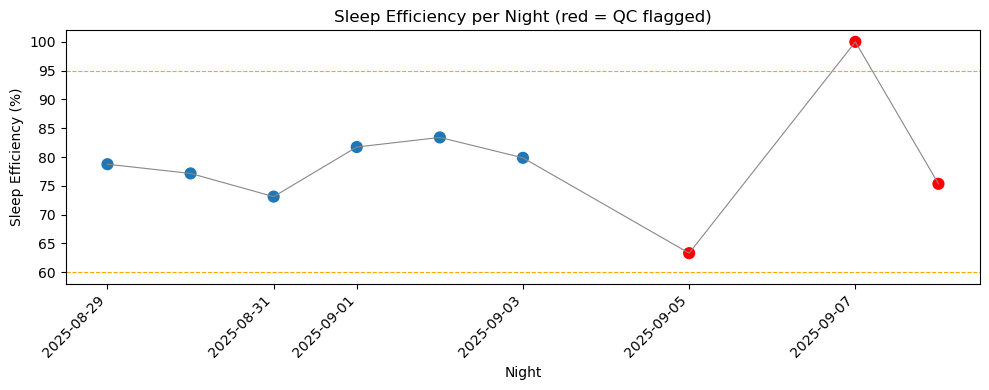

In [4]:
# --- Multi-session processing with QC flags ---

# QC thresholds
EXPECTED_MIN_PER_DAY = 1440
MIN_ACCEPTABLE_MINUTES = 600         # very short day
LOW_EFF_THRESHOLD = 60               # unusually low sleep efficiency
HIGH_EFF_THRESHOLD = 95              # unusually high (may indicate artifact)
MIN_TRANSITION_RATIO = 0.01          # very low variability could be suspicious

subject_dir = os.path.dirname(FILE)
file_pattern = os.path.join(subject_dir, "*.csv")
files = sorted(glob(file_pattern))

results = []
for f in files:
    try:
        act = load_labfront_actigraphy(f)
        pred_df = ck.predict(act.values, epoch_length=60, rescore_data=True)
        pred_df = pred_df.set_index(act.index[:len(pred_df)])
        sleep_col = "sleep_wake" if "sleep_wake" in pred_df.columns else pred_df.columns[0]
        labels = pred_df[sleep_col].astype(int)

        total_minutes = len(labels)
        sleep_minutes = int((labels == 0).sum())
        efficiency = 100.0 * sleep_minutes / total_minutes if total_minutes else float("nan")
        night = labels.index[0].date() if total_minutes else None

        # --- QC metrics ---
        # Expected continuous span coverage
        span_minutes = int((act.index[-1] - act.index[0]).total_seconds() / 60) + 1
        span_completeness = total_minutes / span_minutes if span_minutes > 0 else float("nan")
        day_completeness = total_minutes / EXPECTED_MIN_PER_DAY

        # Transitions (sleep<->wake) as a crude variability metric
        transitions = int(labels.diff().abs().fillna(0).sum())

        flags = []
        if total_minutes < MIN_ACCEPTABLE_MINUTES: flags.append("short_recording")
        if sleep_minutes == 0: flags.append("all_wake")
        if sleep_minutes == total_minutes: flags.append("all_sleep")
        if efficiency < LOW_EFF_THRESHOLD: flags.append("low_eff")
        if efficiency > HIGH_EFF_THRESHOLD: flags.append("high_eff")
        if day_completeness < 0.9 and total_minutes < EXPECTED_MIN_PER_DAY: flags.append("partial_day")
        if span_completeness < 0.95: flags.append("gaps")
        if transitions < total_minutes * MIN_TRANSITION_RATIO: flags.append("almost_static")

        results.append({
            "night": night,
            "file": os.path.basename(f),
            "total_minutes": total_minutes,
            "sleep_minutes": sleep_minutes,
            "efficiency": efficiency,
            "day_completeness": day_completeness,
            "span_completeness": span_completeness,
            "transitions": transitions,
            "qc_flags": flags,
            "qc_pass": len(flags) == 0
        })
    except Exception as e:
        print(f"Error processing {f}: {e}")

results_df = pd.DataFrame(results).sort_values("night")
display(results_df)

# Show only problematic nights
problem_df = results_df[~results_df.qc_pass]
if not problem_df.empty:
    print("Flagged nights:")
    display(problem_df)

# Plot sleep efficiency per night with QC coloring
plt.figure(figsize=(10, 4))
colors = ["red" if len(flist) else "C0" for flist in results_df.qc_flags]
plt.scatter(results_df["night"], results_df["efficiency"], c=colors, s=60)
plt.plot(results_df["night"], results_df["efficiency"], color="#888", linewidth=0.8)
plt.ylabel("Sleep Efficiency (%)")
plt.xlabel("Night")
plt.title("Sleep Efficiency per Night (red = QC flagged)")
plt.xticks(rotation=45, ha="right")
# Reference bands
plt.axhline(LOW_EFF_THRESHOLD, color="orange", linestyle="--", linewidth=0.8)
plt.axhline(HIGH_EFF_THRESHOLD, color="orange", linestyle="--", linewidth=0.8)
plt.tight_layout()
plt.show()

Error 1068_fd8f3437 250918_garmin-device-actigraphy_1068_fd8f3437.csv: Cannot convert non-finite values (NA or inf) to integer
Error 1068_fd8f3437 250925_garmin-device-actigraphy_1068_fd8f3437.csv: Cannot convert non-finite values (NA or inf) to integer
Error 1068_fd8f3437 250929_garmin-device-actigraphy_1068_fd8f3437.csv: Cannot convert non-finite values (NA or inf) to integer
Error 1063_14a4f54d 250904_garmin-device-actigraphy_1063_14a4f54d.csv: Cannot convert non-finite values (NA or inf) to integer
Error 1068_fd8f3437 250918_garmin-device-actigraphy_1068_fd8f3437.csv: Cannot convert non-finite values (NA or inf) to integer
Error 1068_fd8f3437 250925_garmin-device-actigraphy_1068_fd8f3437.csv: Cannot convert non-finite values (NA or inf) to integer
Error 1068_fd8f3437 250929_garmin-device-actigraphy_1068_fd8f3437.csv: Cannot convert non-finite values (NA or inf) to integer


/var/folders/b9/lbb6xc5s5cbgvhhqy321k9th0000gn/T/ipykernel_85197/1386131589.py:10: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df["timestamp"] = pd.to_datetime(df["isoDate"], errors="coerce")


Error 1035_16fd4875 250328_garmin-device-actigraphy_1035_16fd4875.csv: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'
Error 1063_14a4f54d 250904_garmin-device-actigraphy_1063_14a4f54d.csv: Cannot convert non-finite values (NA or inf) to integer


,subject_id,night,file,total_minutes,sleep_minutes,efficiency,day_completeness,span_completeness,transitions,qc_flags,qc_pass,subject_night,cohort_night
0,1035_16fd4875,2025-03-23,250323_garmin-device-actigraphy_1035_16fd4875.csv,641,580,90.483619,0.445139,1.0,13,[partial_day],False,1,1
1,1035_16fd4875,2025-03-24,250324_garmin-device-actigraphy_1035_16fd4875.csv,1439,976,67.824878,0.999306,1.0,54,[],True,2,2
2,1035_16fd4875,2025-03-25,250325_garmin-device-actigraphy_1035_16fd4875.csv,1440,682,47.361111,1.000000,1.0,41,[low_eff],False,3,3
3,1035_16fd4875,2025-03-26,250326_garmin-device-actigraphy_1035_16fd4875.csv,1439,1154,80.194580,0.999306,1.0,34,[],True,4,4
4,1035_16fd4875,2025-03-27,250327_garmin-device-actigraphy_1035_16fd4875.csv,1439,472,32.800556,0.999306,1.0,47,[low_eff],False,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,1068_fd8f3437,2025-09-27,250927_garmin-device-actigraphy_1068_fd8f3437.csv,1440,1150,79.861111,1.000000,1.0,64,[],True,38,48
80,1068_fd8f3437,2025-09-28,250928_garmin-device-actigraphy_1068_fd8f3437.csv,1440,1225,85.069444,1.000000,1.0,44,[],True,39,49
81,1068_fd8f3437,2025-09-28,250928_garmin-device-actigraphy_1068_fd8f3437.csv,1440,1225,85.069444,1.000000,1.0,44,[],True,40,49
82,1068_fd8f3437,2025-09-30,250930_garmin-device-actigraphy_1068_fd8f3437.csv,360,268,74.444444,0.250000,1.0,21,"[short_recording, partial_day]",False,41,50


Aggregated nightly efficiency (QC pass only):


,cohort_night,night,mean_efficiency,median_efficiency,sd_efficiency,n_subjects
0,2,2025-03-24,67.824878,67.824878,NaN,1
1,4,2025-03-26,80.194580,80.194580,NaN,1
2,7,2025-03-30,66.087561,66.087561,NaN,1
3,8,2025-03-31,72.531293,72.531293,NaN,1
4,9,2025-04-01,71.577484,71.577484,NaN,1
5,10,2025-04-02,77.275886,77.275886,NaN,1
6,11,2025-04-03,79.986101,79.986101,NaN,1
7,17,2025-06-02,75.608061,75.608061,0.0,1
8,18,2025-06-03,82.753825,82.753825,0.0,1
9,19,2025-06-04,82.070883,82.070883,0.0,1


Per-subject nightly efficiency by cohort night (may include QC-failed):


subject_id,1035_16fd4875,1052_fcb636ce,1063_14a4f54d,1068_fd8f3437
cohort_night,,,,
1,90.483619,NaN,NaN,NaN
2,67.824878,NaN,NaN,NaN
3,47.361111,NaN,NaN,NaN
4,80.194580,NaN,NaN,NaN
5,32.800556,NaN,NaN,NaN
6,86.486486,NaN,NaN,NaN
7,66.087561,NaN,NaN,NaN
8,72.531293,NaN,NaN,NaN
9,71.577484,NaN,NaN,NaN


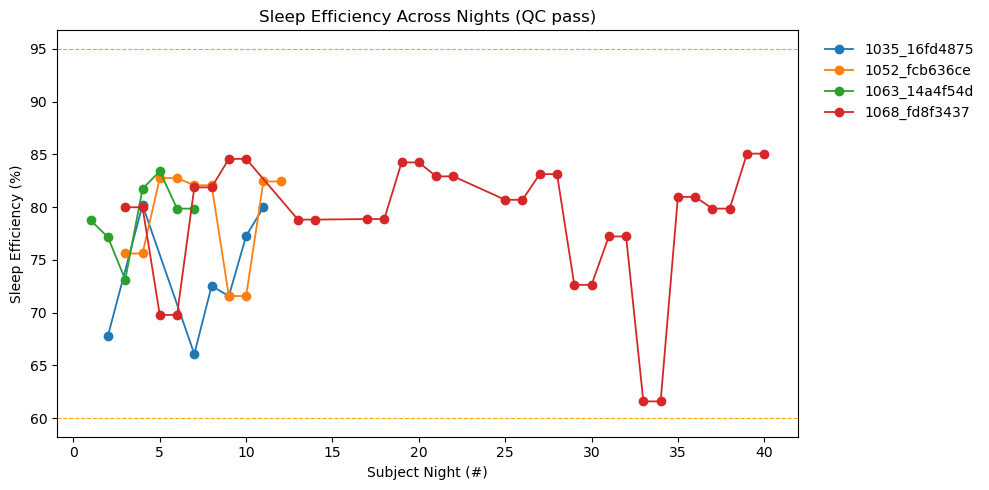

In [5]:
from glob import glob as _orig_glob
import os

# --- Cohort-wide aggregation of nightly sleep efficiency across subjects ---
cohort_root = '/Users/orduek/Library/CloudStorage/OneDrive-BGU/PTSD Cohort/data'
# Cohort root already supplied; only set if missing
try:
    cohort_root
except NameError:
    cohort_root = "/path/to/your/cohort_root"

# Monkey-patch glob() so the later line that searches only */*/garmin-device-actigraphy
# will transparently return dirs that are 1, 2, or 3 levels below cohort_root.

if "___multi_depth_glob_patched" not in globals():
    def glob(pattern):
        suffix_2 = os.path.join("*", "*", "garmin-device-actigraphy")
        if pattern.endswith(suffix_2) and cohort_root in pattern:
            root = pattern[:-len(suffix_2)].rstrip(os.sep)
            patterns = [
                os.path.join(root, "*", "garmin-device-actigraphy"),
                os.path.join(root, "*", "*", "garmin-device-actigraphy"),
                os.path.join(root, "*", "*", "*", "garmin-device-actigraphy"),
            ]
            out = []
            for p in patterns:
                out.extend(_orig_glob(p))
            # Deduplicate and return
            return sorted({d for d in out if os.path.isdir(d)})
        return _orig_glob(pattern)
    ___multi_depth_glob_patched = True

# Find every subject's actigraphy directory
subject_actigraphy_dirs = sorted([
    d for d in glob(os.path.join(cohort_root, "*", "*", "garmin-device-actigraphy"))
    if os.path.isdir(d)
])

all_subjects_results = []

for sdir in subject_actigraphy_dirs:
    subject_id = os.path.basename(os.path.dirname(sdir))
    csv_files = sorted(glob(os.path.join(sdir, "*.csv")))
    if not csv_files:
        continue
    for fpath in csv_files:
        try:
            act_s = load_labfront_actigraphy(fpath)
            pred = ck.predict(act_s.values, epoch_length=60, rescore_data=True)
            pred = pred.set_index(act_s.index[:len(pred)])
            sleep_col_name = "sleep_wake" if "sleep_wake" in pred.columns else pred.columns[0]
            lbl = pred[sleep_col_name].astype(int)

            total_min = len(lbl)
            sleep_min = int((lbl == 0).sum())  # 0=sleep
            eff = 100.0 * sleep_min / total_min if total_min else float("nan")
            night_date = lbl.index[0].date() if total_min else None

            span_min = int((act_s.index[-1] - act_s.index[0]).total_seconds() / 60) + 1
            span_compl = total_min / span_min if span_min > 0 else float("nan")
            day_compl = total_min / EXPECTED_MIN_PER_DAY
            transitions_ = int(lbl.diff().abs().fillna(0).sum())

            flags_ = []
            if total_min < MIN_ACCEPTABLE_MINUTES: flags_.append("short_recording")
            if sleep_min == 0: flags_.append("all_wake")
            if sleep_min == total_min: flags_.append("all_sleep")
            if eff < LOW_EFF_THRESHOLD: flags_.append("low_eff")
            if eff > HIGH_EFF_THRESHOLD: flags_.append("high_eff")
            if day_compl < 0.9 and total_min < EXPECTED_MIN_PER_DAY: flags_.append("partial_day")
            if span_compl < 0.95: flags_.append("gaps")
            if transitions_ < total_min * MIN_TRANSITION_RATIO: flags_.append("almost_static")

            all_subjects_results.append({
                "subject_id": subject_id,
                "night": night_date,
                "file": os.path.basename(fpath),
                "total_minutes": total_min,
                "sleep_minutes": sleep_min,
                "efficiency": eff,
                "day_completeness": day_compl,
                "span_completeness": span_compl,
                "transitions": transitions_,
                "qc_flags": flags_,
                "qc_pass": len(flags_) == 0
            })
        except Exception as e:
            print(f"Error {subject_id} {os.path.basename(fpath)}: {e}")

if not all_subjects_results:
    print("No subject data found.")
else:
    all_results_df = (pd.DataFrame(all_subjects_results)
                        .sort_values(["night", "subject_id"])
                        .reset_index(drop=True))

    # 2. Add night sequence numbers
    # Per-subject chronological index (all nights)
    all_results_df["subject_night"] = (
        all_results_df.sort_values(["subject_id", "night"])
                      .groupby("subject_id").cumcount() + 1
    )
    # Cohort-wide sequential night index (unique dates across cohort)
    unique_nights = sorted(all_results_df["night"].unique())
    cohort_map = {d: i+1 for i, d in enumerate(unique_nights)}
    all_results_df["cohort_night"] = all_results_df["night"].map(cohort_map)

    display(all_results_df)

    # Aggregated nightly efficiency (QC-passing nights only) using cohort_night
    if "qc_pass" in all_results_df:
        agg_night_eff = (all_results_df[all_results_df.qc_pass]
                         .groupby(["cohort_night", "night"])
                         .agg(mean_efficiency=("efficiency", "mean"),
                              median_efficiency=("efficiency", "median"),
                              sd_efficiency=("efficiency", "std"),
                              n_subjects=("subject_id", "nunique"))
                         .reset_index()
                         .sort_values("cohort_night"))
        print("Aggregated nightly efficiency (QC pass only):")
        display(agg_night_eff)
    else:
        agg_night_eff = pd.DataFrame()

    # Wide pivot (cohort night index) for per-subject inspection
    efficiency_pivot = (all_results_df
                        .pivot_table(index="cohort_night",
                                     columns="subject_id",
                                     values="efficiency"))
    print("Per-subject nightly efficiency by cohort night (may include QC-failed):")
    display(efficiency_pivot)

    # Plot: each subject's efficiency trajectory (QC-pass only) vs subject_night
    plt.figure(figsize=(10, 5))
    df_qc = all_results_df[all_results_df.qc_pass]
    for sid, df_sub in df_qc.sort_values(["subject_id", "subject_night"]).groupby("subject_id"):
        plt.plot(df_sub["subject_night"], df_sub["efficiency"], marker="o", label=sid, linewidth=1.3)
    plt.ylabel("Sleep Efficiency (%)")
    plt.xlabel("Subject Night (#)")
    plt.title("Sleep Efficiency Across Nights (QC pass)")
    if df_qc.subject_id.nunique() <= 12:
        plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)
    plt.axhline(LOW_EFF_THRESHOLD, color="orange", linestyle="--", linewidth=0.8)
    plt.axhline(HIGH_EFF_THRESHOLD, color="orange", linestyle="--", linewidth=0.8)
    plt.tight_layout()
    plt.show()

    # (Optional) if you prefer cohort_night instead of subject_night in plot,
    # switch x to df_sub["cohort_night"] above.

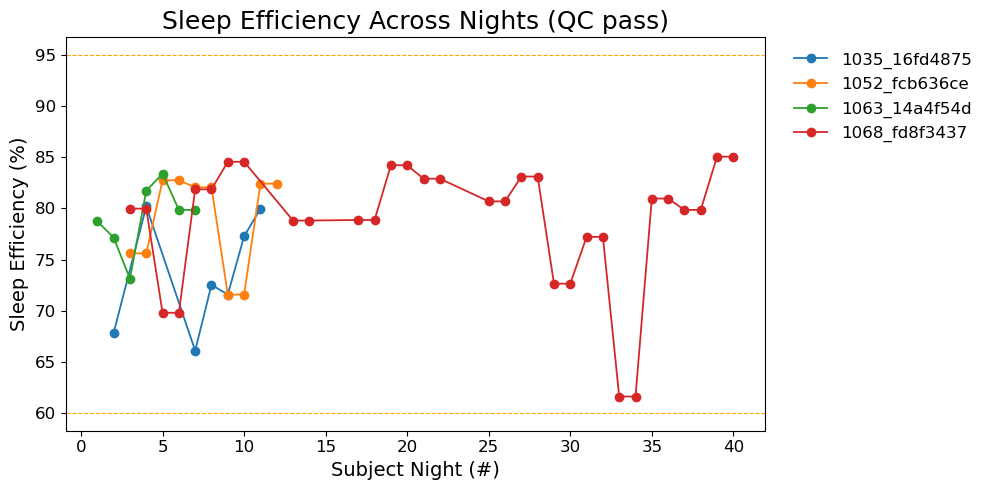

In [6]:
title_fs = 18
label_fs = 14
tick_fs = 12
legend_fs = 12

plt.figure(figsize=(10, 5))
df_qc = all_results_df[all_results_df.qc_pass]
for sid, df_sub in df_qc.sort_values(["subject_id", "subject_night"]).groupby("subject_id"):
    plt.plot(df_sub["subject_night"], df_sub["efficiency"], marker="o", label=sid, linewidth=1.3)

plt.ylabel("Sleep Efficiency (%)", fontsize=label_fs)
plt.xlabel("Subject Night (#)", fontsize=label_fs)
plt.title("Sleep Efficiency Across Nights (QC pass)", fontsize=title_fs)
plt.xticks(fontsize=tick_fs)
plt.yticks(fontsize=tick_fs)

if df_qc.subject_id.nunique() <= 12:
    plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False, fontsize=legend_fs)

plt.axhline(LOW_EFF_THRESHOLD, color="orange", linestyle="--", linewidth=0.8)
plt.axhline(HIGH_EFF_THRESHOLD, color="orange", linestyle="--", linewidth=0.8)
plt.tight_layout()
# save figure
plt.savefig("sleep_efficiency_across_nights.png", dpi=300)
plt.show()
